Group Name: AG 19

Student Name (Student ID):

1. Lee Han Jian (A0248322J)

2. LI SHENGDONG (A0248417Y)

3. ZHENG WENGRUI (A0250948W)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actually, the technical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

In [2]:
# Problem Class
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [3]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 

## Task A:

### Constructing the directed graph

Here we create the directed graph where the nodes in the graph are the strings in the list of reads. We first calculate the exact longest overlap from one string to another and then deal with the ones that fall outside the [5,30] in the next section.

For the representation of the directed graph, we use adjacent matrix for simplicity.

In [4]:
import csv

class DirectedGraph:
    def __init__(self):
        # strings array stores all the strings read from the csv file
        strings = []
        with open("data.csv") as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # ignore the first line
            for row in csvreader:
                strings.append(row[2])
        
        # number of reads
        number_of_reads = len(strings)
        
        # create adjacent matrix
        # since all edges always have negative weight, graph[A][B] has weight 0 means there is NO edge from A to B
        # initialize all matrix element to 0, which means there is no edge in the graph initially
        # self.adjMatrix[i][j] means the edge FROM string[i] TO string[j]
        self.adjMatrix = [[0] * number_of_reads for _ in range(number_of_reads)]
        
        # next_arrays is a list of lists which stores next arrays for all strings
        next_arrays = []
        for string in strings:
            next_arrays.append(DirectedGraph.next_array(string))
                    
        # i is the index of the FROM string (the former one, s1)
        for i in range(number_of_reads):
            # j is the index of the TO string (the latter one, s2)
            for j in range(number_of_reads):
                # there should not be edge from A to A
                if i != j:
                    # the distance from i to j is negate overlap
                    self.adjMatrix[i][j] = - DirectedGraph.overlap(strings[i], strings[j], next_arrays[j])
                    
    '''
    Calculate overlap of string A (s1) to B (s2)
    Algorithm KMP
    '''
    # calculate next array of s2, which is pattern in this case
    @staticmethod
    def next_array(s2):
        nextA = [0] * len(s2)
        j = 0
        k = -1
        nextA[j] = k
        while j < len(s2) - 1:
            if (k == -1) or (s2[j] == s2[k]):
                j += 1
                k += 1
                if s2[j] == s2[k]:
                    nextA[j] = nextA[k]
                else:
                    nextA[j] = k
            else:
                k = nextA[k]
        return nextA

    @staticmethod
    def overlap(s1, s2, next_s2):
        '''
        Returns longest overlap from s1 to s2
        i.e. the longest suffix of s1, which is also prefix of s2
        pass the next array of s2 in, since we need to compute overlap of each pair and we need to use next_s2 for several times
        '''

        l1 = len(s1)
        l2 = len(s2)
        # if l1 < l2, then we start from 0 in text
        if l1 < l2:
            i = 0
        # if l1 >= l2, then we start from (l1 - l2) in text
        else:
            i = l1 - l2

        j = 0
        while i < l1:
            if (j == -1) or (s1[i] == s2[j]):
                i += 1
                j += 1
            else:
                j = next_s2[j]
        # when i steps into the void after s1's last element
        # j is the length of the prefix matched
        return j

# Constructing the Directed graph, it may take several seconds, please wait patiently before it completes
print("Start constructing directed graph from data.csv file")    
dg = DirectedGraph()
print("Directed graph constructed!")

Start constructing directed graph from data.csv file
Directed graph constructed!


### Limiting the overlap within [5,30]

#### Enforcing the upper bound

As described in the question, we should limit the overlap from 5 to 30 (both inclusive). Firstly, we want to deal with edges with overlap larger than 30. Actually, we will see from the below code: there is only one edge has a weight less than -30, which is from Read 457 to Read 27. This edge corresponds to an overlap of 62.

In [5]:
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance < -30:
            print(f"Distance from Read {i} to Read {j} is {distance}")

Distance from Read 457 to Read 27 is -62


However, if we limit Read 457 to Read 27's overlap to a upper bound 30, they will happen to have an overlap of 30, i.e. the last 30 chars of Read 457 is exactly the same as the first 30 chars of Read 27. It also means that the weight of the edge from Read 457 to Read 27 is exactly -30.

The code below slightly changes the algorithm used to compute overlap from one string to another. It starts by comparing only from the last 30 elements of the first string, i.e. imposing the upper bound of the result to 30 (inclusive). And the result turns out to be that overlap from Read 457 to Read 27 is 30 when we impose the upper bound 30.

In [6]:
'''
Calculate overlap of string A (s1) to B (s2) with an upper bound of 30
Algorithm KMP
'''
# calculate next array of s2, which is pattern in this case
def next_array(s2):
    nextA = [0] * len(s2)
    j = 0
    k = -1
    nextA[j] = k
    while j < len(s2) - 1:
        if (k == -1) or (s2[j] == s2[k]):
            j += 1
            k += 1
            if s2[j] == s2[k]:
                nextA[j] = nextA[k]
            else:
                nextA[j] = k
        else:
            k = nextA[k]
    return nextA


def overlap(s1, s2, next_s2):
    '''
    Returns longest overlap from s1 to s2, the upper bound is 30
    i.e. the longest suffix of s1, which is also prefix of s2
    pass the next array of s2 in, since we need to compute overlap of each pair and we need to use next_s2 for several times
    '''

    l1 = len(s1)
    l2 = len(s2)
    i = l1 - 30  # impose the upper bound to 30

    j = 0
    while i < l1:
        if (j == -1) or (s1[i] == s2[j]):
            i += 1
            j += 1
        else:
            j = next_s2[j]
    # when i steps into the void after s1's last element
    # j is the length of the prefix matched
    return j


with open("data.csv") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # ignore the first line
    for row in csvreader:
        if int(row[0]) == 457:
            s1 = row[2]
        elif int(row[0]) == 27:
            s2 = row[2]

print(f"When imposing the upper bound of 30, overlap from Read 457 to Read 27 is {overlap(s1,s2,next_array(s2))}")
            

When imposing the upper bound of 30, overlap from Read 457 to Read 27 is 30


#### Enforcing the lower bound

If Read A to Read B has an overlap less than 5, then when we impose the lower bound of 5, Read A to Read B will have no overlap. We could simply say that there is no edge from Read A to Read B.

We could simply set these edges's weight back to 0, which means there is no edge.

In [7]:
# edge count
count = 0
# count of edges with weight > -5, i.e. overlap is less than -5 
count_to_exclude = 0
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance != 0:
            count += 1
            if distance > -5:
                count_to_exclude += 1
            
print(f"Total number of edges in graph is {count}")
print(f"Among these edges, there are {count_to_exclude} edges has weight > -5, i.e. overlap is less than 5. If we exclude these edges, there are {count - count_to_exclude} edges in total")


Total number of edges in graph is 126876
Among these edges, there are 125369 edges has weight > -5, i.e. overlap is less than 5. If we exclude these edges, there are 1507 edges in total


#### Implement the limit of [5,30] in our directed graph

From the above two session, we can conclude that to impose the limit of [5,30] in overlap. We should

- set the weight from Read 457 to Read 27 to 30
- delete all edges with weight > -5

In the following code cell, we do the limit task.

In [8]:
# impose the upper bound
dg.adjMatrix[457][27] = -30

# impose the lower bound
for i,row in enumerate(dg.adjMatrix):
    for j,weight in enumerate(row):
        if weight > -5 and weight < 0:
            dg.adjMatrix[i][j] = 0

### Counting edges and visualization of their weight distribution

In this session, we count the number of valid edges (whose weight fall inside [-30,-5], i.e. corresponding overlap fall inside [5,30]) and visualize the distribution in bar plot using `matplotlib`.

From the above code cell, we know that we have **126876** edges in the original directed graph (weight lies between -1 to -62).

From the below code cell, we know that we have **1507** edges (whose weight is between -5 to -30) in our graph.

PS: Please make sure that you have ran the upper code cell imposing the limit before run the below code cell. Otherwise you will get a totally different results.

Number of valid edges is 1507


<BarContainer object of 26 artists>

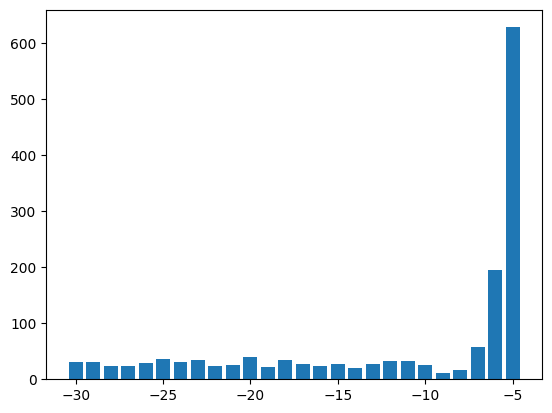

In [9]:
# Visualize the weight distribution
import matplotlib.pyplot as plt

# HashMap saving number of edges with different weight
hm = {}
# edge count
count = 0
for i,row in enumerate(dg.adjMatrix):
    for j,distance in enumerate(row):
        if distance != 0:
            count += 1
            hm[distance] = hm.get(distance, 0) + 1

print(f"Number of valid edges is {count}")
# x and height of bar plot
x = []
height = []
for dist, number in hm.items():
    x.append(dist)
    height.append(number)
plt.bar(x, height)

## Task B:

First of all, the goal is to minimize the length of the final string which is the combination of all strings provided. This can be reduced to maximize the total overlap of every two consecutive strings. When we define the distance from Read A to Read B as the -overlap from A to B, our goal turns into minimize the total -overlap of every two consecutive strings.

Because of this theoretical foundation, we could treat two unconnected strings (whose edge has weight 0) as the two endpoint connected with 0 overlap. Adding these 0 weight edge will not affect the total -overlap we found, nor will affect the length of the final string combined.

So in the following part, we treat 0 weight edge as they are connected with 0 -overlap and the graph becomes a fully connected graph in this sense.

### TSP class

In the TSP class, we model state as a list of index. The index stands for a Read, for example, index 105 stands for Read 105.
Moreover, the order in the list stands for the order we travel across all cities (in the genome assembly case, the order we assemble strings). For example, [...107,409,...] means we first use Read 107 and it is followed by 409. 

In the TSP class, we implement two things:

1. the method to generate neighbors
2. the method to calculate value of a state (a complete configuration)

#### Generating neighbors

##### 2-opt

For the neighbors generating, we use 2-opt method to generate neighbors. The `two_opt` method in the class accepts the current state, the index (in state list) of the end point for the first edge to cut, the index (in state list) of the start point for the second edge to cut. To be more specific, `two_opt(self, state, i, j)` means cutting edge from `state[i-1]` to `state[i]` and edge from `state[j]` to `state[j+1]`. This method will generate a new state and return it.

In the `expand` method, we accepts a state and returns a random neighbor by randomizing the i and j, i.e. the two edge to cut.

##### "exchange two" method

We also try another neighbor generation method, which we name "exchange two" method. In this method, we also randomly choose two number i,j and exchange the positions of `state[i]` and `state[j]` in the Read list. The meaning of this operation is that we exchange the position of Read `state[i]` and Read `state[j]` in the final combined string.

This method does less change to the total overlap since only four overlap will be influenced. This property indicates that the neighbors of one state will have similar value to the value of the state, which produces a more smooth "landscape".

#### Calculating value of a state

Just iterate over the state list and pick out every pair of indexes adjacent to each other in the state list, query the distance from `state[i]` to `state[i+1]` in the directed graph and return the sum.


In [14]:
# Code to generate neighbours, value of states, etc.
class TSP(Problem):
    #Implement TSP class here
    def __init__(self, graph, expand_method, initial=None):
        super().__init__(initial=initial)
        self.graph = graph
        self.vertice_number = len(graph)
        if expand_method == '2-opt':
            self.expand_method = self.two_opt
        else:
            self.expand_method = self.exchange_two
    
    # calculate the total distance of a configuration, i.e. the total -overlap of a configuration
    # Here the state should be a complete configuration, which means has 599 elements inside it
    def value(self, state):
        res = 0
        for i in range(self.vertice_number - 1):
            res += self.graph[state[i]][state[i+1]]
        return res    
    
    # Using 2-opt to find neighbors
    # cut edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
    def two_opt(self, state, i, j):
        new_state = [0] * self.vertice_number
        # 0 ~ (i-1)
        for k in range(i):
            new_state[k] = state[k]
            
        # i
        new_state[i] = state[j]
        
        # (i+1) ~ (j-1)
        for k in range(i+1, j):
            new_state[k] = state[i + j - k]
        
        # j
        new_state[j] = state[i]
        
        # (j+1) ~ (vertice_number-1)
        for k in range(j+1, self.vertice_number):
            new_state[k] = state[k]
            
        return new_state
    
    # Another way to generate neighbors, which is randomly choose two read in the state list and exchange their position
    # in the state list
    def exchange_two(self, state, i, j):
        new_state = state[:]
        new_state[i] = state[j]
        new_state[j] = state[i]
        return new_state
    
    # Expansion here is randomly choosing i and j, and using 2-opt to generate results from 
    # cutting edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
    # simply return the new state returned by 2-opt
    def expand(self, state):
        # Since 2-opt will cut edge from state[i-1] to state[i] and edge from state[j] to state[j+1]
        # i is at least 1, at most (self.vertice_number - 3), both inclusive
        # j is at least (i + 1), at most (self.vertice_number - 2), both inclusive
        # to make (state[i-1], state[i]) and (state[j], state[j+1]) non-adjacent, we only need to make sure i != j
        r1 = randint(1, self.vertice_number - 2)
        r2 = randint(1, self.vertice_number - 2)
        # reroll when r1 == r2
        while r1 == r2:
            r1 = randint(1, self.vertice_number - 2)
            r2 = randint(1, self.vertice_number - 2)
        if r1 < r2:
            i, j = r1, r2
        else:
            i, j = r2, r1
        new_state = self.expand_method(state, i, j)
        return new_state   
    
# initialize TSP problem with directed graph we genreated
tsp_problem = TSP(dg.adjMatrix, expand_method="2-opt")
# another expand method: exchange two
tsp_problem_exchange_two = TSP(dg.adjMatrix, expand_method="exchange_two")

### Greedy search algorithm

We first run a Greedy search algorithm to get a sufficiently acceptable benchmark. For this Greedy search algorithm, the state is an index list in which each index stands for the corresponding string and the order of the indexes stands for the concatenance order. For example, [1,2,3] means the first string we use is Read 1 and followed by Read 2 and finnally followed by Read 3.

The initial state is `[]` which means there is no string visited. The goal state we want is a list containing all strings index without duplication which means we have visited all strings in a specific order.

We call it greedy search algorithm because every time we select a child to move on, we try to add to the state list a string whose prefix has largest overlap with the state list's last string's suffix.

The goal state of Greedy search algorithm could also be used as an initial state for Simulated Annealing algorithm.

#### Tricky choice of the start point

Since the choice of an index (standing for a Read with that index) to add to the state list is based on the last string we already have in the state list, when we have no string index in the state list, we have to randomly choose one. So when designing the Greedy class, we need to pass a start index to initialize the Greedy search algorithm.

Here comes the tricky part, which start point performs better in this greedy search algorithm?

Actually we have done the test. We iterate over all possible start point (which is 0-598 in this problem), and find out the start point 596 will give us the lowest value -12011. But actually the results of different start points are quite close to each other, majority of them lies bewteen -11880 and -12000.

Since it's a little time-consuming to run through all the start points, we don't give the complete code below. Instead we just give our implementation of Greedy search class and the code to run this search with start point 596. It's rather easy to extend the code to run through all start points.

In [15]:
class Greedy:
    def __init__(self, problem, start):
        self.problem = problem
        self.initial = []
        self.start = start
        
    def is_goal(self, state):
        # if the len of state equals to the total strings number, then we know we have finished searching
        # since we will do re-visit check in proceed function so there is guaranteed to be no duplication
        # in the state list.
        return len(state) == self.problem.vertice_number
    
    def proceed(self, state):
        # if there is at least one string index in the state
        # we choose the best successor of last_string, i.e. making overlap from last string to new string largest
        if state:
            last_string = state[-1]
            
            # min_weight is the lowest weight we have found
            min_weight = 1
            # min_index stores the string index with lowest weight
            min_index = -1
            
            # j is the index of next string we want to use
            for j in range(self.problem.vertice_number):
                # if we haven't used string j before
                if j not in state:
                    if self.problem.graph[last_string][j] < min_weight:
                        min_weight = self.problem.graph[last_string][j]
                        min_index = j
                        
            state.append(min_index)
            return state

        else:
            # if it is the initial state, we just simply choose Read start
            return [self.start]
    
    # generate a goal state
    def gen(self):
        state = self.initial
        while not self.is_goal(state):
            state = self.proceed(state)
        return state
            
    
# set the start point as Read 596  
greedy = Greedy(problem=tsp_problem, start=596)
res = greedy.gen()
print(res)
print(f"The total -overlap found by greedy search algorithm is {tsp_problem.value(res)}")

initial_state_for_SA = res

[596, 68, 403, 471, 490, 188, 507, 142, 378, 449, 530, 176, 169, 457, 27, 523, 358, 129, 380, 65, 183, 39, 108, 30, 369, 1, 228, 298, 586, 277, 195, 517, 589, 410, 413, 71, 383, 566, 0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 196, 219, 243, 18, 352, 191, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 179, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 82, 51, 135, 328, 334, 484, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 175, 225, 246, 288, 145, 411, 565, 516, 301, 159, 519, 462, 6, 433, 269, 525, 448, 561, 292, 198, 542, 155, 60, 79, 303, 415, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 1

### Implementation of Simulated Annealing

In the implementation of Simulated annealing, just as implemented in TSP class, we first use 2-opt to generate neighbors.

For initial state, we use our best goal state from Greedy search algorithm as the initial state for Simulated Annealing algorithm.

For scheduling, we use constant times initial value as our initial temperature. We use exponential decay strategy. So that there are two hyperparameters in our SA which is constant for initial temperature and the cooling rate.

In [16]:
from random import randint, uniform, shuffle
from math import exp

# tolerance used in float point number comparison 
TOLERANCE = 0.0000001

# Simuated Annealing 
class SA:
    def __init__(self, problem):        
        # randomly generate initial
        #self.initial = [i for i in range(self.vertice_number)]
        #shuffle(self.initial)
        self.problem = problem
        self.problem.initial = initial_state_for_SA
        
        # cooling rate
        self.cooling_rate = 0.1
        # constant chosen as negative number since the value is negative number
        self.constant = -1
        self.initial_temperature = self.constant * self.problem.value(self.problem.initial)
    
    def set_hyperparameter(self, constant, cooling_rate):
        self.constant = constant
        self.cooling_rate = cooling_rate
    
    # schduling procedure
    def schedule(self, t):
        return self.initial_temperature * exp(- self.cooling_rate * t)
    
    def search(self):
        current_state = self.problem.initial
        # t is time
        t = 1
        while True:
            # T is temperature 
            T = self.schedule(t)
            if abs(T - 0) < TOLERANCE:
                return current_state
            
            # randomly choose one neighbor randomly from neighbors
            next_state = self.problem.expand(current_state)
            
            # Delta E
            deltaE = self.problem.value(current_state) - self.problem.value(next_state)
            
            if deltaE > 0:
                current_state = next_state
            else:   
                p = exp(deltaE / T)
                r = uniform(0,1)
                if r <= p:
                    current_state = next_state
            t += 1
        
sa = SA(problem=tsp_problem)
res = sa.search()
print(res)
print(f"The result found by Simulated annealing is {tsp_problem.value(res)}")

[596, 65, 380, 493, 583, 88, 581, 522, 221, 240, 252, 314, 260, 363, 220, 520, 150, 569, 129, 358, 523, 27, 457, 169, 176, 530, 449, 378, 142, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 115, 205, 135, 51, 82, 597, 67, 555, 132, 501, 106, 324, 25, 166, 257, 531, 143, 97, 259, 113, 78, 472, 206, 101, 414, 163, 209, 514, 315, 421, 58, 42, 368, 192, 333, 83, 551, 537, 365, 112, 310, 576, 579, 266, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 11, 124, 200, 340, 265, 478, 446, 439, 532, 592, 447, 130, 254, 126, 327, 359, 128, 539, 538, 164, 466, 64, 546, 570, 211, 544, 467, 210, 251, 425, 193, 521, 455, 204, 429, 178, 275, 172, 526, 487, 229, 554, 3, 355, 337, 571, 550, 402, 119, 575, 325, 7, 231, 545, 270, 558, 297, 598, 331, 454, 543, 353, 20, 141, 104, 347, 121, 170, 34, 207, 253, 197, 572, 475, 278, 574, 162, 541, 294, 373, 189, 308, 186, 99, 463, 62, 28, 177, 110, 262, 160, 408, 12

#### Trying different cooling rate and constant for initial temperature

In the following session, we have tried different combination of cooling rates and initial temperature constants to observe which combination of hyperparameters provides the best result.

One of the best results we have found using the previous algorithms is the value -9654 with cooling rate = 0.1 and constant = -5 (since the simulated annealing algorithm will randomly choose successor, rerunning the code are unable to reproduce the result again). 

A general trend we can conclude from the results executed from the code below is that the higher cooling rate, the better results. Also, the initial temperature constant's influence is much smaller when compared with the cooling rate. In other words, the less we search, the better result we get. However, this may be because we have already been in a local maxima since the initial state is the best goal state generated by our Greedy algorithm. With more steps to go, the SA may wander from the local maxima and go further up in a higher ground with little chance to be captured by another local/global maxima.

However, there is an inflection point in the cooling rate $\lambda = 0.0001$. When compared with the cooling rate $\lambda = 0.001$, the result returned by cooling rate $\lambda = 0.0001$ is obviously better than the result returned by cooling rate $\lambda = 0.001$. It may indicate that when there are abundant search times, i.e. when the temperature goes down slowly enough, the simulated annealing will gradually perform better with the lower cooling rate, i.e. with more search times.

But as you may notice, no combinations of constants and cooling rate we test out-perform the greedy search algorithm. However, with lower cooling rate (especially when the cooling rate $\lambda = 0.0001$), it takes a longer time to compute the result when compared to the greedy search.

In [17]:
# in the result hashmap `res_hm`, the key is the tuple of constant and cooling rate we set, and the value is the tuple
# of result state we found and the value of the result state.
res_hm = {}

for const in [-1, -2, -5, -10, -100]:
    for cr in [0.1, 0.01, 0.001, 0.0001]:
        sa.set_hyperparameter(constant=const, cooling_rate=cr)
        res = sa.search()
        res_hm[(const, cr)] = (res, tsp_problem.value(res)) 
        print(f"The result found with constant {const} and cooling rate {cr} is {tsp_problem.value(res)}")

The result found with constant -1 and cooling rate 0.1 is -7917
The result found with constant -1 and cooling rate 0.01 is -2653
The result found with constant -1 and cooling rate 0.001 is -458
The result found with constant -1 and cooling rate 0.0001 is -1078
The result found with constant -2 and cooling rate 0.1 is -8687
The result found with constant -2 and cooling rate 0.01 is -2080
The result found with constant -2 and cooling rate 0.001 is -436
The result found with constant -2 and cooling rate 0.0001 is -844
The result found with constant -5 and cooling rate 0.1 is -9654
The result found with constant -5 and cooling rate 0.01 is -2153
The result found with constant -5 and cooling rate 0.001 is -405
The result found with constant -5 and cooling rate 0.0001 is -1009
The result found with constant -10 and cooling rate 0.1 is -8906
The result found with constant -10 and cooling rate 0.01 is -2409
The result found with constant -10 and cooling rate 0.001 is -556
The result found with

As the best result we found is with high cooling rate and low constant, several samples of the result read index list we found are listed as follows:

In [18]:
print("Sample 1:")
print(res_hm[(-1, 0.1)])
print()

print("Sample 2:")
print(res_hm[(-2, 0.1)])
print()

print("Sample 3:")
print(res_hm[(-5, 0.1)])
print()

print("Sample 4:")
print(res_hm[(-10, 0.1)])
print()

print("Sample 5:")
print(res_hm[(-100, 0.1)])
print()

Sample 1:
([596, 68, 403, 471, 490, 188, 335, 69, 289, 316, 522, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 130, 447, 581, 88, 23, 4, 436, 424, 167, 76, 187, 126, 327, 359, 128, 539, 538, 164, 466, 64, 546, 570, 592, 532, 439, 572, 197, 253, 207, 34, 170, 121, 583, 117, 16, 560, 587, 290, 527, 464, 503, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 107, 266, 547, 594, 595, 45, 47, 91, 313, 302, 350, 241, 5, 185, 178, 275, 172, 526, 487, 229, 554, 3, 355, 337, 24, 10, 406, 345, 144, 419, 265, 450, 395, 394, 309, 56, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 162, 541, 157, 100, 272, 77, 385, 271, 422, 548, 367, 510, 588, 171, 564, 558, 204, 429, 46, 12, 552, 329, 416, 137, 161, 230, 390, 2, 113, 78, 472, 206, 101, 414, 397, 115, 205, 486, 95, 456, 323, 284, 148, 21, 19, 250, 80, 22, 428, 133, 127, 236, 189, 308, 186, 99, 463, 62, 28, 177, 110, 262, 160, 40

#### Another way of generating neighbors

In this part, we try another way of generating neighbors, which is "exchange two" method as described in the previous TSP class section. We want to know how different ways of generating neighbors will affect the results of Simulated Annealing algorithms with the same scheduling procedure. 

We run the same search code with different cooling rates and constants for initial temperature in order to compare the differences bewteen two different neighbor generation ways.

In [21]:
sa = SA(problem=tsp_problem_exchange_two)
# in the result hashmap `res_hm`, the key is the tuple of constant and cooling rate we set, and the value is the tuple
# of result state we found and the value of the result state.
res_hm = {}

for const in [-1, -2, -5, -10, -100]:
    for cr in [0.1, 0.01, 0.001, 0.0001]:
        sa.set_hyperparameter(constant=const, cooling_rate=cr)
        res = sa.search()
        res_hm[(const, cr)] = (res, tsp_problem_exchange_two.value(res)) 
        print(f"The result found with constant {const} and cooling rate {cr} is {tsp_problem_exchange_two.value(res)}")

The result found with constant -1 and cooling rate 0.1 is -8958
The result found with constant -1 and cooling rate 0.01 is -709
The result found with constant -1 and cooling rate 0.001 is -2310
The result found with constant -1 and cooling rate 0.0001 is -6584
The result found with constant -2 and cooling rate 0.1 is -8911
The result found with constant -2 and cooling rate 0.01 is -634
The result found with constant -2 and cooling rate 0.001 is -2297
The result found with constant -2 and cooling rate 0.0001 is -6507
The result found with constant -5 and cooling rate 0.1 is -8975
The result found with constant -5 and cooling rate 0.01 is -545
The result found with constant -5 and cooling rate 0.001 is -2399
The result found with constant -5 and cooling rate 0.0001 is -6773
The result found with constant -10 and cooling rate 0.1 is -8768
The result found with constant -10 and cooling rate 0.01 is -708
The result found with constant -10 and cooling rate 0.001 is -2397
The result found wit

From the above result, we could see that although the best results also come with the largest cooling rate, the inflection point comes **earlier** with "exchange two" method. The constant for initial temperature still has relatively little influence on the final results.

From $\lambda = 0.01$ onwards, the results produced by Simulated Annealing with "exchange two" neighbor generating method increase significantly. Moreover, the results come from $\lambda = 0.0001$ with "exchange two" method are much better than the ones with the same cooling rate but using 2-opt neighbor generating method.

Although the results from cooling rate $\lambda = 0.0001$ are still worse than the results from $\lambda = 0.1$ (in this case we only search few steps around the suspected local maxima returned by greedy search algorithm), it is very close to the latter one.

Since from $\lambda = 0.01$ onwards the lower cooling rate we set the better results we get, we have reasons to believe that if we set the cooling rate smaller than 0.0001, maybe we could get a even better result. And below is one of the best result we found with small cooling rate which is comparable to the result found with cooling rate $\lambda = 0.1$.

In [27]:
sa.set_hyperparameter(constant=-10, cooling_rate=0.00001)
res = sa.search()
print(f"The result found with constant {-10} and cooling rate {0.00001} is {tsp_problem_exchange_two.value(res)}")
print(f"The result index list is: {res}")

The result found with constant -10 and cooling rate 1e-05 is -8202
The result index list is: [596, 68, 520, 451, 405, 123, 489, 149, 71, 383, 522, 316, 289, 273, 26, 218, 370, 487, 229, 356, 473, 372, 459, 384, 593, 158, 212, 318, 542, 155, 532, 302, 350, 92, 190, 540, 276, 495, 282, 239, 511, 401, 412, 362, 577, 129, 380, 65, 127, 236, 374, 49, 490, 188, 507, 319, 184, 404, 139, 98, 417, 72, 255, 291, 107, 147, 53, 63, 28, 177, 197, 572, 439, 379, 430, 122, 470, 279, 246, 288, 481, 557, 388, 586, 277, 174, 346, 530, 176, 381, 591, 332, 365, 112, 310, 203, 423, 373, 503, 494, 48, 233, 227, 90, 504, 172, 526, 180, 89, 85, 484, 199, 563, 96, 314, 260, 531, 143, 432, 2, 223, 33, 101, 414, 163, 209, 514, 464, 527, 290, 587, 150, 569, 584, 311, 264, 508, 562, 387, 518, 237, 57, 589, 102, 304, 431, 173, 578, 326, 35, 560, 16, 117, 354, 524, 581, 447, 130, 307, 295, 479, 521, 455, 297, 187, 126, 327, 359, 128, 142, 378, 449, 111, 491, 110, 262, 160, 435, 364, 375, 234, 245, 221, 334, 145, 411